# Library

In [28]:
#These Library are imported from GATSBY WU
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None
import joblib
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import gc

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.linear_model import  RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import folium # for plotting latitudes and longitudes in map
from folium import plugins
from folium.plugins import HeatMap

# Import datasets

In [9]:
us_data = pd.read_csv('Datasets/US_Accidents_Dec21_updated.csv')
us_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,36.10000,58.00000,29.76000,10.00000,SW,10.40000,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,NaN,91.00000,29.68000,10.00000,Calm,NaN,0.02000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,NaN,97.00000,29.70000,10.00000,Calm,NaN,0.02000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,NaN,55.00000,29.65000,10.00000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,29.80000,93.00000,29.69000,10.00000,WSW,10.40000,0.01000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
print('The Dataset contains: {} rows and {} columns.'.format(us_data.shape[0],us_data.shape[1]))

The Dataset contains: 2845342 rows and 47 columns.


In [14]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [15]:
#view the data in each column with numeric data
us_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,2845342.00000,1101431.00000,2776068.00000,2375699.00000,2772250.00000,2786142.00000,2774796.00000,2687398.00000,2295884.00000
mean,2.13757,36.24520,-97.11463,36.24532,-97.11439,0.70268,8089.40811,61.79356,59.65823,64.36545,29.47234,9.09939,7.39504,0.00702
std,0.47872,5.36380,18.31782,5.36387,18.31763,1.56036,18360.09399,18.62263,21.16097,22.87457,1.04529,2.71755,5.52745,0.09349
min,1.00000,24.56603,-124.54807,24.56601,-124.54575,0.00000,0.00000,-89.00000,-89.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,2.00000,33.44517,-118.03311,33.44628,-118.03333,0.05200,1270.00000,50.00000,46.00000,48.00000,29.31000,10.00000,3.50000,0.00000
50%,2.00000,36.09861,-92.41808,36.09799,-92.41772,0.24400,4007.00000,64.00000,63.00000,67.00000,29.82000,10.00000,7.00000,0.00000
75%,2.00000,40.16024,-80.37243,40.16105,-80.37338,0.76400,9567.00000,76.00000,76.00000,83.00000,30.01000,10.00000,10.00000,0.00000
max,4.00000,49.00058,-67.11317,49.07500,-67.10924,155.18600,9999997.00000,196.00000,196.00000,100.00000,58.90000,140.00000,1087.00000,24.00000


In [16]:
missing_value = us_data.isna().sum(axis=0).sort_values(ascending=False)
missing_value = missing_data.to_frame()
missing_value.columns = ['missing_count']
missing_value = missing_data.loc[missing_data['missing_count']>0]

missing_data

,missing_count
Street,2
City,137
Zipcode,1319
Civil_Twilight,2867
Sunrise_Sunset,2867
Astronomical_Twilight,2867
Nautical_Twilight,2867
Timezone,3659
Airport_Code,9549
Weather_Timestamp,50736


In above table, we can see that the "Number" column has the most NULL value or missing count, so we will drop it.

In [18]:
us_data = us_data.drop("Number",axis=1)

In [20]:
us_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.23000,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.10000,36.10000,58.00000,29.76000,10.00000,SW,10.40000,0.00000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.74700,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90000,NaN,91.00000,29.68000,10.00000,Calm,NaN,0.02000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.05500,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.00000,NaN,97.00000,29.70000,10.00000,Calm,NaN,0.02000,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.12300,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.00000,NaN,55.00000,29.65000,10.00000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.17239,-84.49279,39.17048,-84.50180,0.50000,At Mitchell Ave/Exit 6 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.00000,29.80000,93.00000,29.69000,10.00000,WSW,10.40000,0.01000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# Top 10 Accident states in US (2016 - 2021) 

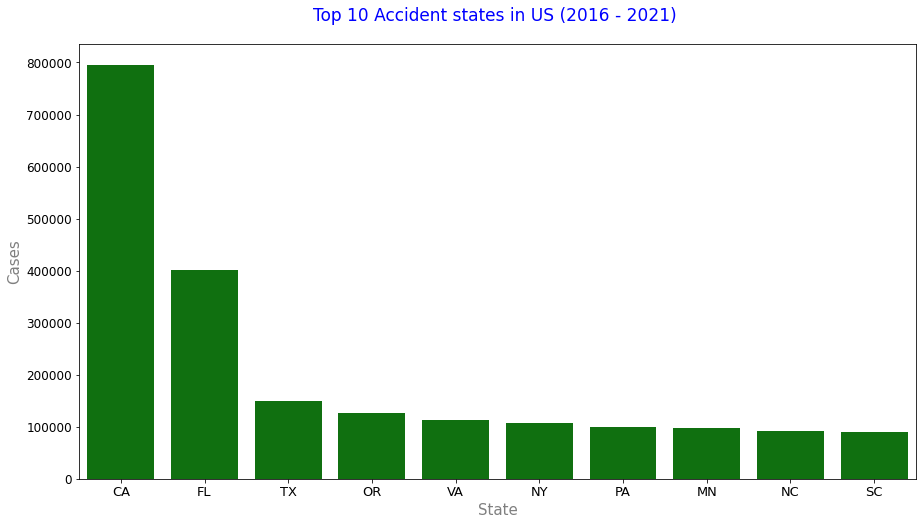

In [87]:
state = pd.DataFrame(us_data.State.value_counts()).reset_index().rename(columns={"index":"State","State":"Cases"})
top_state = pd.DataFrame(state.head(10))
plt.figure(figsize=(15,8))
plt.title("Top {} Accident states in US (2016 - 2021) ".format(len(top_state)),size=17,color="Blue",y=1.04)
plt.xlabel('\n States \n', fontsize = 15, color = 'grey')
plt.ylabel('\nAccident Cases\n', fontsize = 15, color = 'grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x = top_state.State, y=state.Cases,color= "Green")
plt.show()

# Top 10 Accident Cities in US (2016 - 2021) 

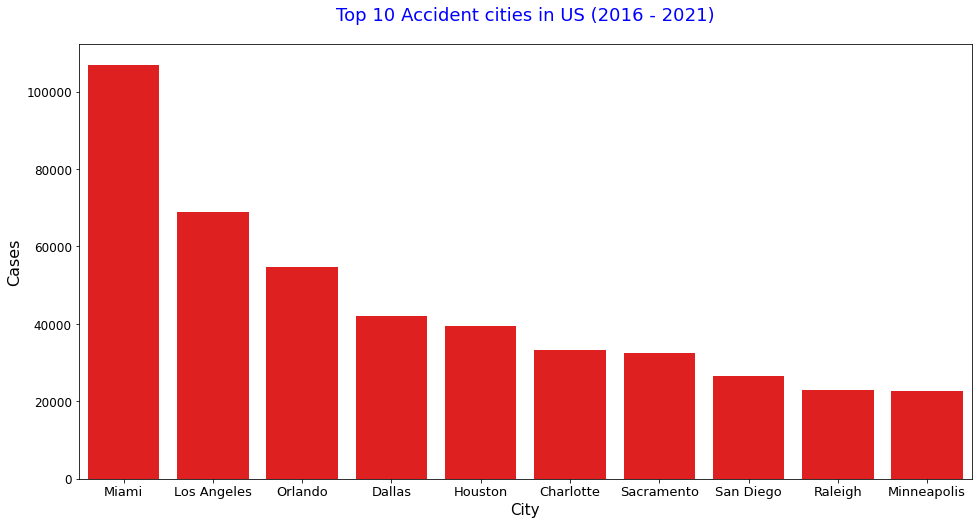

In [85]:
city = pd.DataFrame(us_data.City.value_counts()).reset_index().rename(columns={"index":"City", "City":"Cases"})
top_city = pd.DataFrame(city.head(10))
plt.figure(figsize=(16, 8))
plt.title("Top {} Accident cities in US (2016 - 2021)".format(len(top_city)), size=18, color='blue', y=1.04)
plt.xlabel('\n City \n', fontsize = 15, color = 'black')
plt.ylabel('\nAccident Cases\n', fontsize = 16, color = 'black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.barplot(x = top_city.City, y=city.Cases,color= "red")
plt.show()

In [99]:
#Showing the percentage of the accident cases reported on the city.

for (i, j) in zip(city["City"], range(0,10)):
    print("Percentage of accident cases reported in city : {} is {:.2f}%".format(i, (city.Cases[j]/len(city.Cases))))

Percentage of accident cases reported in city : Miami is 9.16%
Percentage of accident cases reported in city : Los Angeles is 5.90%
Percentage of accident cases reported in city : Orlando is 4.68%
Percentage of accident cases reported in city : Dallas is 3.59%
Percentage of accident cases reported in city : Houston is 3.38%
Percentage of accident cases reported in city : Charlotte is 2.84%
Percentage of accident cases reported in city : Sacramento is 2.79%
Percentage of accident cases reported in city : San Diego is 2.28%
Percentage of accident cases reported in city : Raleigh is 1.96%
Percentage of accident cases reported in city : Minneapolis is 1.95%


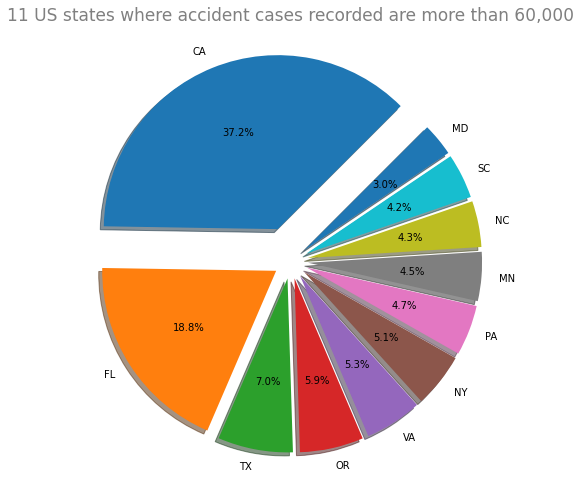

In [98]:
#As there are 10657 unique cities, we cant plot data for all of them.
#So, I only plot data of cities which had reported more than 10k accident cases.
a = us_data.State.value_counts()
plt.figure(figsize=(10,8))
lab = a[a>60000].index
plt.title("{} US states where accident cases recorded are more than 60,000".format(len(lab)),size=17,color="grey",y=1.04)
plt.pie(a[a>60000],shadow=True,explode=(0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), startangle=45,labels=lab,autopct='%1.1f%%')
plt.show()